# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [ ]:
bank_data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Churn_Modelling.csv?raw=true')

In [ ]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
exited_counts = bank_data['Exited'].value_counts()

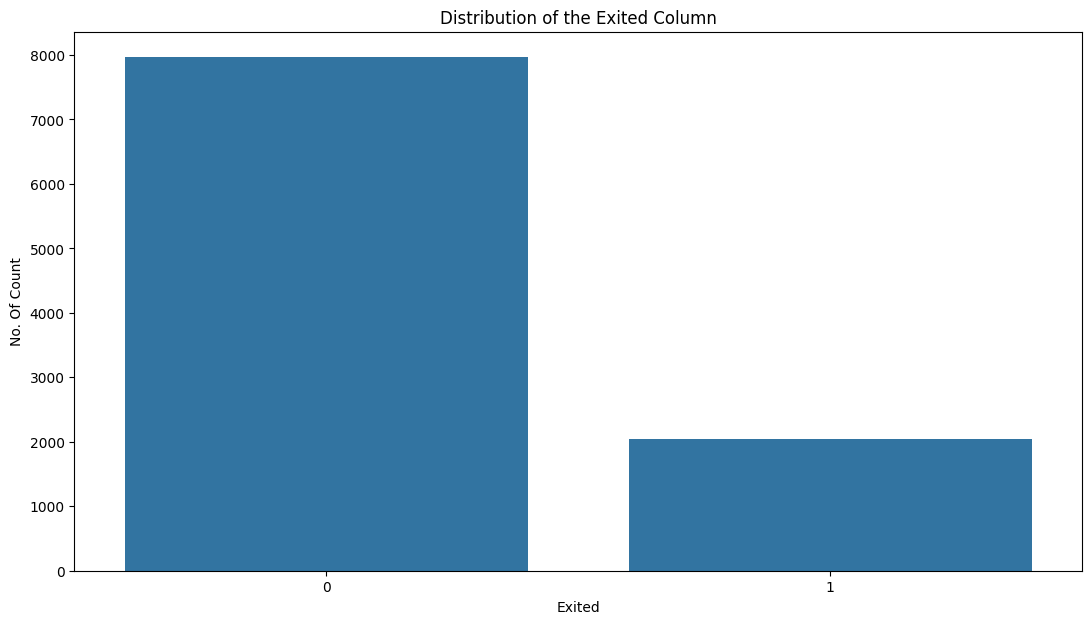

In [ ]:
plt.figure(figsize=(13, 7))
sns.barplot(x=exited_counts.index,y=exited_counts)
plt.xlabel('Exited')
plt.ylabel('No. Of Count')
plt.title('Distribution of the Exited Column')
plt.show()


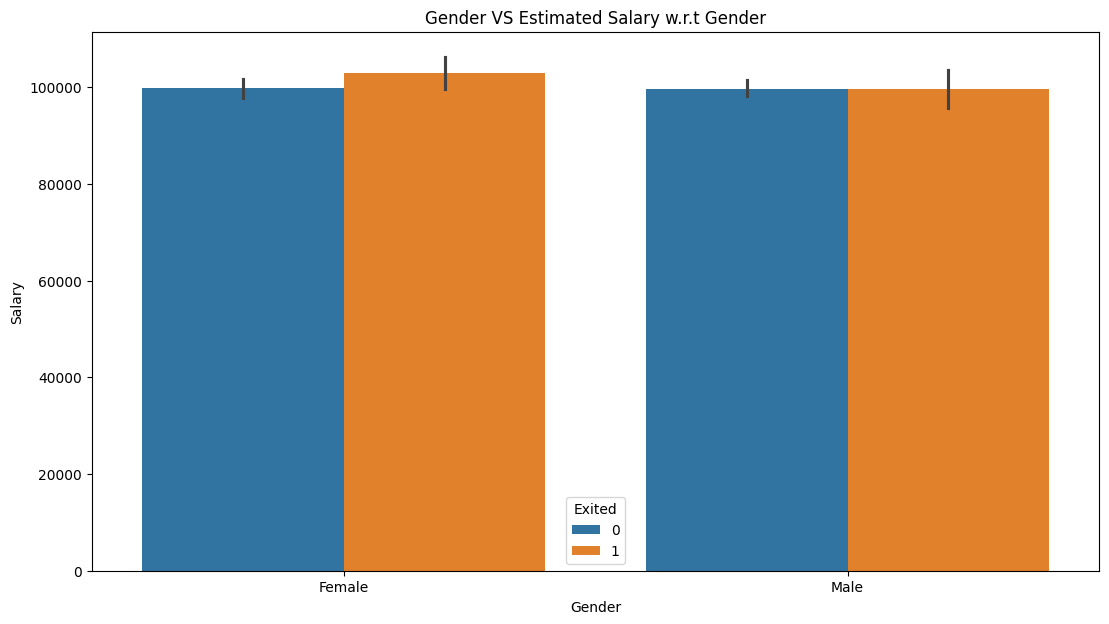

In [ ]:
plt.figure(figsize=(13, 7))
sns.barplot(data=bank_data,x='Gender',y='EstimatedSalary',hue='Exited')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Gender VS Estimated Salary w.r.t Gender')
plt.show()

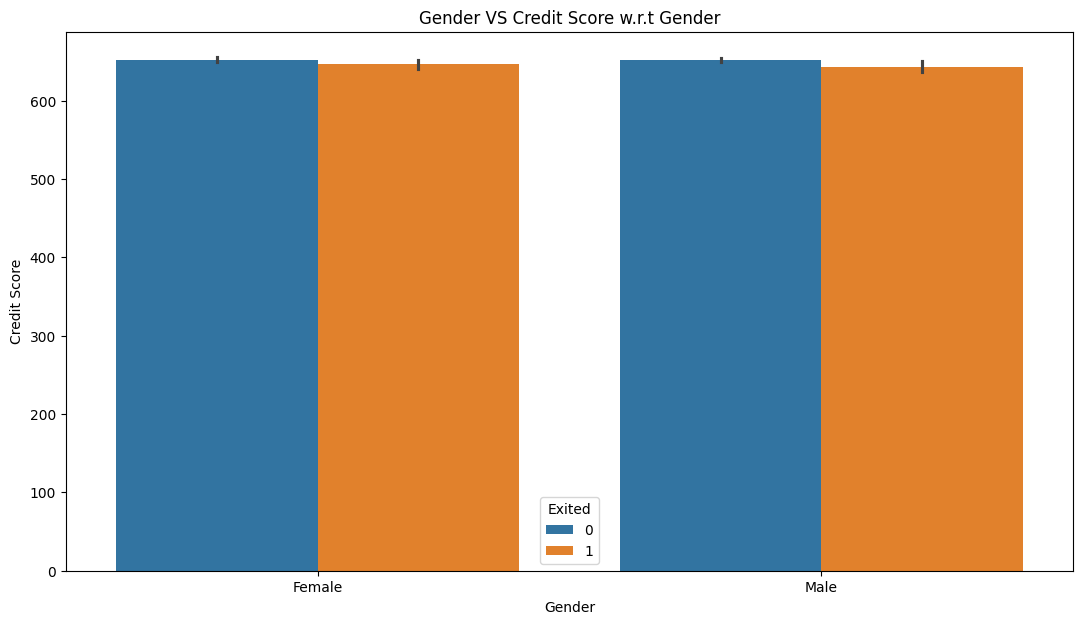

In [ ]:
plt.figure(figsize=(13, 7))
sns.barplot(data=bank_data,x='Gender',y='CreditScore',hue='Exited')
plt.xlabel('Gender')
plt.ylabel('Credit Score')
plt.title('Gender VS Credit Score w.r.t Gender')
plt.show()

# Encoder data

## Applying Label Encoding

## Appyling Label Encoding

In [ ]:
bank_data['Gender'] = bank_data['Gender'].map({'Male':0,'Female':1})

## Appyling One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

In [ ]:
one_hot_encoder.fit(bank_data[['Geography']])

OneHotEncoder()

In [ ]:
temp = one_hot_encoder.transform(bank_data[['Geography']]).toarray()

In [ ]:
one_hot_encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [ ]:
temp_data = pd.DataFrame(data=temp,columns=['France', 'Germany', 'Spain'],dtype='int')

In [ ]:
temp_data.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [ ]:
bank_data = pd.concat([bank_data,temp_data],axis=1)

In [ ]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Droping irrelevent columns

In [ ]:
bank_data.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [ ]:
bank_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Manually Spliting Our Data Into Training And Testing

Making a dataframe of customers of value exited equal to 1:

In [ ]:
bank_exited_1 = bank_data[bank_data['Exited']==1]

Making a dataframe of customers of value exited equal to 1:

In [ ]:
bank_exited_0 = bank_data[bank_data['Exited']==0]

Here we are chosing the 80% records who have the value 0 of exited column for training and 20% for testing

In [ ]:
train_0 = bank_exited_0.sample(frac=1).iloc[:6371]
test_0 = bank_exited_0.sample(frac=1).iloc[6371:]

Here we are chosing the 80% records who have the value 1 of exited column for training and 20% for testing

In [ ]:
train_1 = bank_exited_1.sample(frac=1).iloc[:1630]
test_1 = bank_exited_1.sample(frac=1).iloc[1630:]

Combining train_0 and train_1 to training data

In [ ]:
training = pd.concat([train_0,train_1])

Combining test_0 and test_1 to testing data

In [ ]:
testing = pd.concat([test_0,test_1])

Spliting our data into trainig and testing w.r.t X and Y

In [ ]:
X_train = training.drop('Exited',axis=1)
Y_train = training['Exited']
X_test = testing.drop('Exited',axis=1)
Y_test = testing['Exited']

# Applying SVC model

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(C=0.0001,gamma=10)

In [ ]:
svm_model.fit(X_train,Y_train)

SVC(C=0.0001, gamma=10)

# Making Predictions

In [ ]:
predictions = svm_model.predict(X_test)

# Checking our model's performance

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(predictions,Y_test))

[[1592  407]
 [   0    0]]


In [ ]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1999
           1       0.00      0.00      0.00         0

    accuracy                           0.80      1999
   macro avg       0.50      0.40      0.44      1999
weighted avg       1.00      0.80      0.89      1999



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying Grid Search CV for Best Parameters

In [ ]:
bank_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Defining a Dict with some values of C and gamma

In [ ]:
params = {
    'C':[0.0001,0.001,0.01,0.1,10,100,1000,10000],
    'gamma':[10,1,0.1,0.01,0.0001,0.00001,0.000001,0.0000001]
}

In [ ]:
params = {
    'C':[0.0001,0.001,0.01,0.1],
    'gamma':[10,1,0.1,0.01]
}

## Traing model with the the combinations of the parametters

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(SVC(),params,verbose=2)

In [ ]:
grid_model.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.0001, gamma=10; total time=   1.1s
[CV] END .................................C=0.0001, gamma=10; total time=   1.1s
[CV] END .................................C=0.0001, gamma=10; total time=   1.2s
[CV] END .................................C=0.0001, gamma=10; total time=   1.8s
[CV] END .................................C=0.0001, gamma=10; total time=   3.7s
[CV] END ..................................C=0.0001, gamma=1; total time=   3.2s
[CV] END ..................................C=0.0001, gamma=1; total time=   3.2s
[CV] END ..................................C=0.0001, gamma=1; total time=   2.6s
[CV] END ..................................C=0.0001, gamma=1; total time=   2.5s
[CV] END ..................................C=0.0001, gamma=1; total time=   4.2s
[CV] END ................................C=0.0001, gamma=0.1; total time=   2.5s
[CV] END ................................C=0.000

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'gamma': [10, 1, 0.1, 0.01]},
             verbose=2)

## Printing the best combination of perameters

In [ ]:
grid_model.best_params_

{'C': 0.0001, 'gamma': 10}

## Predictions

In [ ]:
grid_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])